In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,76
1,117
2,10
3,118
4,2
...,...
1915,85
1916,58
1917,47
1918,48


<Axes: >

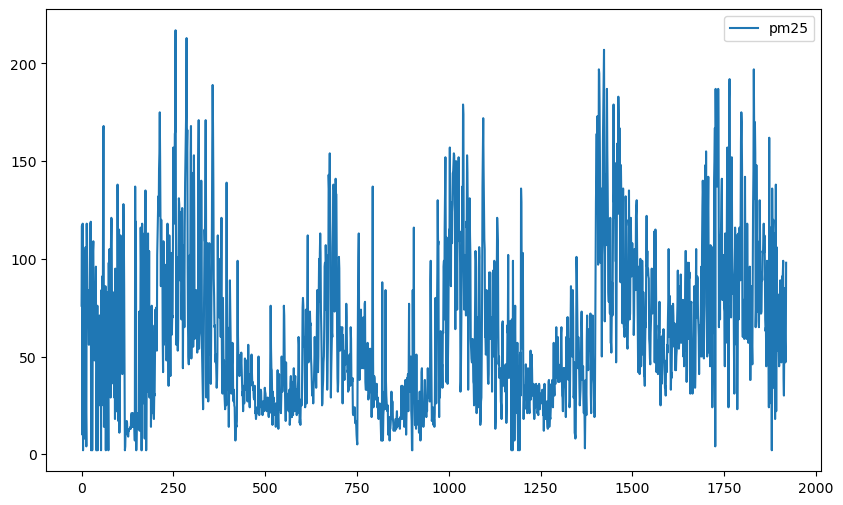

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1728
Test data size: 192


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16195.213, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16568.337, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16473.301, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16387.015, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16566.346, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16193.900, Time=2.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16241.398, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16192.334, Time=1.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16193.961, Time=1.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16385.167, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16190.381, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16385.023, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16471.305, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=16192.009, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 4. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+31, step=1)

# Tạo mảng 30 ngày 
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[142.91708684 120.77661548 109.65665002 104.07169069 101.26666664
  99.85785423  99.15028369  98.79490915  98.61642367  98.52678003
  98.48175686  98.45914415  98.447787    98.44208292  98.43921807
  98.43777921  98.43705655  98.43669359  98.4365113   98.43641974
  98.43637376  98.43635066  98.43633906  98.43633324  98.43633031
  98.43632884  98.43632811  98.43632773  98.43632755  98.43632746]


In [10]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 39.12742288251481

Testing MAPE: 74.94273506462243

MAE: 31.95762658579377


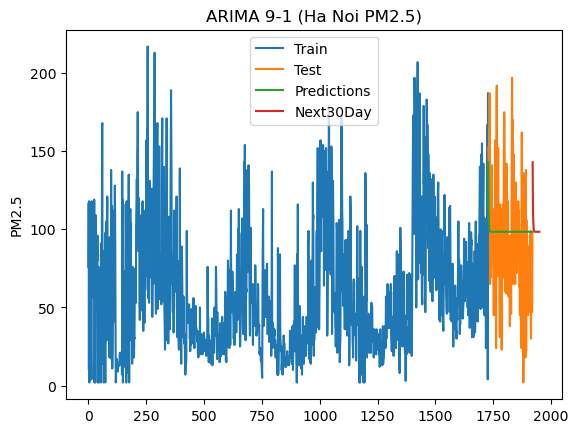

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('ARIMA 9-1 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

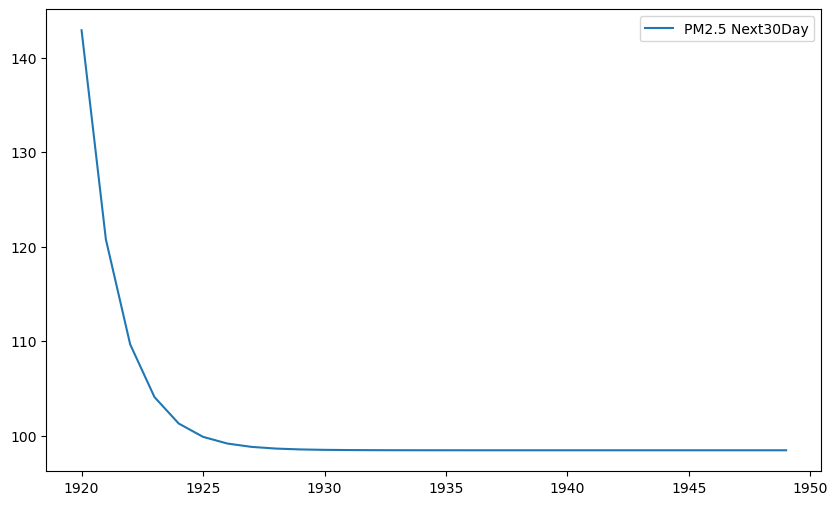

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)